<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#UK-Commentary" data-toc-modified-id="UK-Commentary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>UK Commentary</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#10th-April" data-toc-modified-id="10th-April-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>10th April</a></span></li><li><span><a href="#8th-April" data-toc-modified-id="8th-April-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>8th April</a></span></li><li><span><a href="#7th-April" data-toc-modified-id="7th-April-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>7th April</a></span></li><li><span><a href="#3rd-April" data-toc-modified-id="3rd-April-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>3rd April</a></span></li><li><span><a href="#31st-March" data-toc-modified-id="31st-March-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>31st March</a></span></li></ul></li></ul></div>

## UK Commentary
Official figures are here:
* https://www.gov.uk/guidance/coronavirus-covid-19-information-for-the-public#number-of-cases-and-deaths

## Load data, Fit Model

In [7]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry

# Load and fix UK data
fix_data = {'2020-03-12': 590,
               '2020-03-15': 1391,
               '2020-03-19': 3269,}

uk = CovidCountry(country='United Kingdom',
                  province=True,
                  filepath='../data/raw/',
                  fixes=fix_data)

uk.load(today=73758)
uk.fit(start_str='2020-02-26',
       duration_guess=7*14,
       peak_guess=130000)

gb_df = uk.predict()

## Display Actual vs Prediction

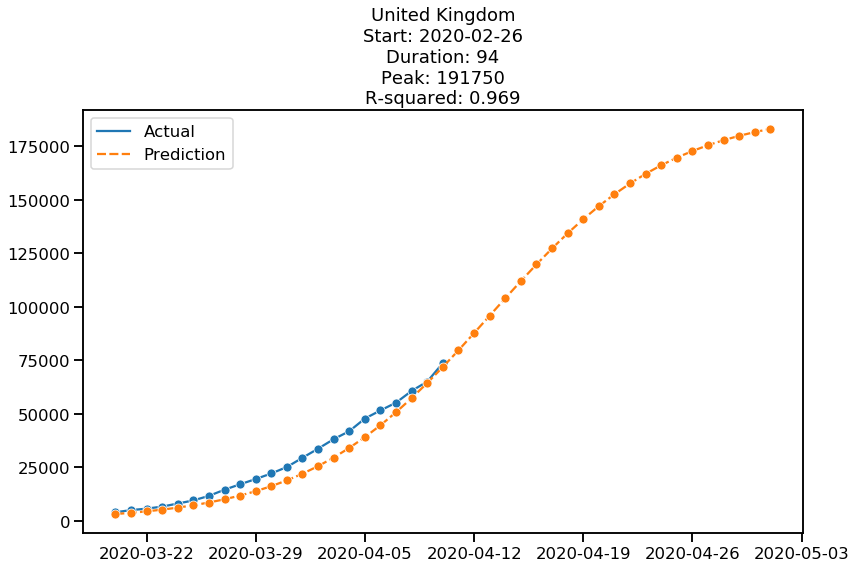

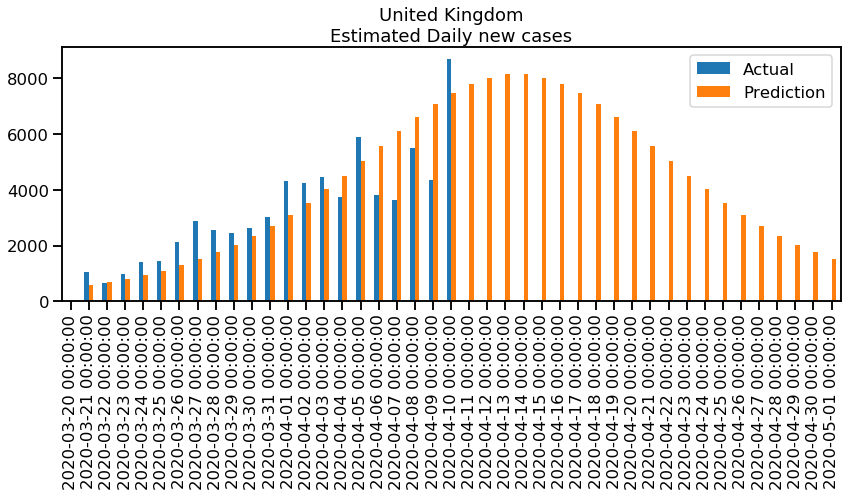

In [8]:
uk.display(offset=21)

## Commentary
### 10th April
UK was not including key worker tests - these were all added today to catch up. That adds about 300-500 a day going forward. That curve appears to lag the population - which makes sense. They catch it in hospital, and there is a lag in testing for those people - perhaps up to 2 weeks until testing catches up and becomes pro-active. i.e. the test capacity will exceed the requirement to measure people with symptoms, and can start testing people with no symptoms in order of risk such as ICU, transport teams etc.

### 8th April
I'm erring more towards longer duration. I've updated accordingly.

### 7th April
I'm pretty sure the peak will be before this Sunday - but its hard to know if our duration is longer like Italy, or shorter like Germany.

### 3rd April
I suspect the testing is now catching up. I've returned the duration guess to 7*12 days, my initial duration for Italy. I know this is the most optimistic case, but I've seen other countries in Europe; Spain, France and possibly Germany, all show durations less than the current Italian spread. As always this only remains true if people behave in a way the suppresses the spread. It should be clear by the end of next week if we've passed peak new daily cases.

### 31st March
The total tests could be close to, or exceeding the current capacity to propose each day. We had 7k total tests performed today, with 33% shown as positive. A week ago we performed 3k tests (well under the initially capacity) and this showed 12% positive test rate. I would expect that ratio to stay fairly constant unless:
- Hospitals are being more specific with symptoms and testing a smaller set, and this is the real case.
- Hospitals are still testing everybody, but the processing can't keep up at the moment, and the real cases are higher, and will show as bigger peaks in later days.

I tend towards the later explanation, so I'm going to keep the model stats close to Italy for now.
